In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data=pd.read_csv(mouse_drug_data_to_load)
clinical_data=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
data_combined=pd.merge(clinical_data, mouse_data, on="Mouse ID", how="left")


# Display the data table for preview
data_combined.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
data_grouped=data_combined.groupby(["Drug","Timepoint"], as_index=False)
tumor_mean=data_grouped["Tumor Volume (mm3)"].mean()
# Convert to DataFrame


# Preview DataFrame
tumor_mean.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_se_data=data_combined[["Drug","Timepoint","Tumor Volume (mm3)"]]

tumor_se=tumor_se_data.groupby(["Drug","Timepoint"]).sem().reset_index()

# Convert to DataFrame
# Preview DataFrame
tumor_se.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
tumor_mean_pivot=pd.pivot_table(tumor_mean, index=["Timepoint"],columns=["Drug"])
tumor_se_pivot=pd.pivot_table(tumor_se,index=["Timepoint"],columns=["Drug"])
tumor_mean_pivot.columns=tumor_mean_pivot.columns.droplevel(0)
tumor_se_pivot.columns=tumor_se_pivot.columns.droplevel(0)
# Preview that Reformatting worked
tumor_se_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


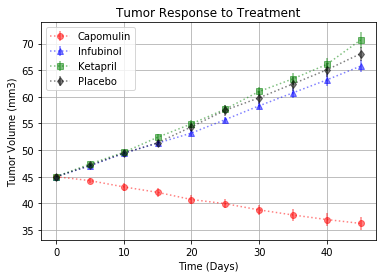

In [20]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
ax.errorbar((np.arange(0, 50,5)),tumor_mean_pivot["Capomulin"] , yerr=tumor_se_pivot["Capomulin"], fmt="o",color="r",linestyle="dotted", alpha=0.5)
ax.errorbar((np.arange(0, 50,5)),tumor_mean_pivot["Infubinol"] , yerr=tumor_se_pivot["Infubinol"], fmt="^",color="b",linestyle="dotted", alpha=0.5)
ax.errorbar((np.arange(0, 50,5)),tumor_mean_pivot["Ketapril"] , yerr=tumor_se_pivot["Ketapril"], fmt="s",color="g",linestyle="dotted", alpha=0.5)
ax.errorbar((np.arange(0, 50,5)),tumor_mean_pivot["Placebo"] , yerr=tumor_se_pivot["Placebo"], fmt="d",color="black",linestyle="dotted", alpha=0.5)

plt.legend()
plt.grid()
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")

# Save the figure
plt.savefig("Images/TumoreVol.png")

In [7]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_grouped=data_combined.groupby(["Drug","Timepoint"])
met_mean=met_grouped["Metastatic Sites"].mean()

# Convert to DataFrame
met_mean_pd=pd.DataFrame(met_mean)

# Preview DataFrame
met_mean_pd.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_se=met_grouped["Metastatic Sites"].sem()


# Convert to DataFrame
met_se_pd=pd.DataFrame(met_se)

# Preview DataFrame
met_se_pd.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
met_mean_pd_pivot=pd.pivot_table(met_mean_pd, index=["Timepoint"],columns=["Drug"])
met_se_pd_pivot=pd.pivot_table(met_se_pd,index=["Timepoint"],columns=["Drug"])
met_mean_pd_pivot.columns=met_mean_pd_pivot.columns.droplevel(0)
met_se_pd_pivot.columns=met_se_pd_pivot.columns.droplevel(0)

# Preview that Reformatting worked
met_mean_pd_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


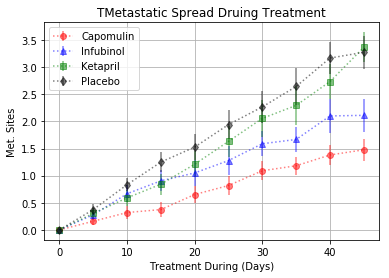

In [21]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
ax.errorbar((np.arange(0, 50,5)),met_mean_pd_pivot["Capomulin"] , yerr=met_se_pd_pivot["Capomulin"], fmt="o",color="r",linestyle="dotted", alpha=0.5)
ax.errorbar((np.arange(0, 50,5)),met_mean_pd_pivot["Infubinol"] , yerr=met_se_pd_pivot["Infubinol"], fmt="^",color="b",linestyle="dotted", alpha=0.5)
ax.errorbar((np.arange(0, 50,5)),met_mean_pd_pivot["Ketapril"] , yerr=met_se_pd_pivot["Ketapril"], fmt="s",color="g",linestyle="dotted", alpha=0.5)
ax.errorbar((np.arange(0, 50,5)),met_mean_pd_pivot["Placebo"] , yerr=met_se_pd_pivot["Placebo"], fmt="d",color="black",linestyle="dotted", alpha=0.5)

plt.legend()
plt.grid()
ax.set_xlabel("Treatment During (Days)")
ax.set_ylabel("Met. Sites")
plt.title("TMetastatic Spread Druing Treatment")


# Save the Figure
plt.savefig("Images/TumorSpread.png")
# Show the Figure
plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_grouped=data_combined.groupby(["Drug","Timepoint"],as_index=False)
mice_count=mice_grouped["Mouse ID"].count()

# Convert to DataFrame
mice_count.rename(columns={"Mouse ID":"Mouse Count"}, inplace=True)

# Preview DataFrame
mice_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_pivot=pd.pivot_table(mice_count, index=["Timepoint"],columns=["Drug"])

mice_count_pivot.columns=mice_count_pivot.columns.droplevel(0)

# Preview the Data Frame
mice_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


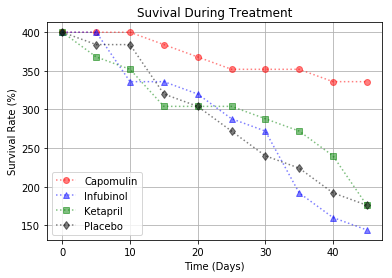

In [22]:
# Generate the Plot (Accounting for percentages)
mice_count_pivot["Capomulin"]=(mice_count_pivot["Capomulin"]/25)*100
mice_count_pivot["Infubinol"]=(mice_count_pivot["Infubinol"]/25)*100
mice_count_pivot["Ketapril"]=(mice_count_pivot["Ketapril"]/25)*100
mice_count_pivot["Placebo"]=(mice_count_pivot["Placebo"]/25)*100

fig, ax = plt.subplots()
ax.errorbar((np.arange(0, 50,5)),mice_count_pivot["Capomulin"] , fmt="o",color="r",linestyle="dotted", alpha=0.5)
ax.errorbar((np.arange(0, 50,5)),mice_count_pivot["Infubinol"] ,  fmt="^",color="b",linestyle="dotted", alpha=0.5)
ax.errorbar((np.arange(0, 50,5)),mice_count_pivot["Ketapril"] ,  fmt="s",color="g",linestyle="dotted", alpha=0.5)
ax.errorbar((np.arange(0, 50,5)),mice_count_pivot["Placebo"] ,  fmt="d",color="black",linestyle="dotted", alpha=0.5)

plt.legend()
plt.grid()
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
plt.title("Suvival During Treatment")

# Save the Figure
plt.savefig("Images/SurvivalRate.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug

summary=tumor_mean_pivot.pct_change(periods=9).iloc[-1:]
summary_t=summary.T.reset_index()
summary_t.rename(columns={"index":"Drug", 45:"Timepoint"}, inplace=True)
# Display the data to confirm
summary_t

Timepoint,Drug,Timepoint
0,Capomulin,-0.194753
1,Ceftamin,0.425165
2,Infubinol,0.461235
3,Ketapril,0.570288
4,Naftisol,0.539233
5,Placebo,0.512980
6,Propriva,0.472412
7,Ramicane,-0.223209
8,Stelasyn,0.520851
9,Zoniferol,0.465798


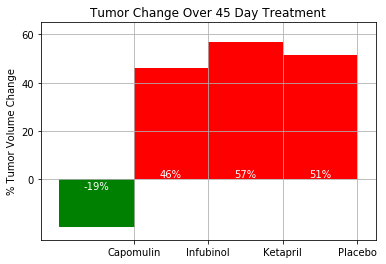

In [23]:
# Store all Relevant Percent Changes into a Tuple
per_change=[summary_t.iloc[0],summary_t.iloc[2],summary_t.iloc[3],summary_t.iloc[5]]
per_change_pd=pd.DataFrame(per_change)
major_ticks = np.arange(0, 61, 20) 
# Splice the data between passing and failing drugs
fig,ax=plt.subplots()
x_axis=np.arange(len(per_change_pd))
tick_location=[value+1 for value in x_axis]

#plt.figure(figsize=(7,3))
bar_graph=plt.bar(x_axis, per_change_pd["Timepoint"]*100, color="r", width=1, align="edge")
plt.xticks(tick_location,per_change_pd["Drug"])
ax.set_yticks(major_ticks)
bar_graph[0].set_color("green")

# Orient widths. Add labels, tick marks, etc. 
plt.grid()
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlim(-0.25, len(x_axis)+0.25)
plt.ylim(-25, 65)

plt.ylabel("% Tumor Volume Change")

# Use functions to label the percentages of changes
def label_bar( bars, text_format, **kwargs):
    
    for bar in bars:
        text = text_format.format(bar.get_height())
        text_x = bar.get_x() + bar.get_width() / 2
        text_y = bar.get_height()
        if text_y>=0:
            text_y = bar.get_height() - bar.get_height()
        else:
            text_y = bar.get_height() -bar.get_height() - 5

        ax.text(text_x, text_y, text, ha='center', va='bottom', color="white",**kwargs)

# Call functions to implement the function calls
value_format = "{:.0f}%"
label_bar( bar_graph, value_format)

# Save the Figure
plt.savefig("Images/TumorVolChange.png")
# Show the Figure
fig.show()

In [17]:
#trend observations
#1. Among 4 main treatments, only Capomulin has obviously positive effect on controling the deterioration of tumor, espcially on control the size of tumor.
#2. Based on the results of Capomul,the relationship between tumor volumn and suvival rate is positive. However, if we look at the results of Infubinal, 
    # the answer is negative. To determine which trend is significant which is not happen by chance, we will need to collect more samples to conduct the research.
#3. The treatment results of Infubinol and Ketapril are similar to Placebo's, 
    #futher reseach such as ANOVA test and ttest is needed to determine if these two treatments' results have significant difference from placebo.
